In [127]:
# Import all the required liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
#Load Adult Train Data Set
df = pd.read_csv("C:/Users/acer/Desktop/Data Science/Data Sets/Adult/train.csv")
df.head(10)

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0,40.0,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,45.0,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0,40.0,United-States,>50K


In [129]:
df.shape

(19258, 15)

In [130]:
df.dtypes

Age                object
Workclass          object
fnlwgt             object
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss       object
hours-per-week    float64
native-country     object
Salary             object
dtype: object

In [131]:
#Check if any missing value present in data
df.isnull().sum()

Age               0
Workclass         6
fnlwgt            6
education         6
education-num     6
marital-status    6
occupation        6
relationship      7
race              7
sex               8
capital-gain      8
capital-loss      8
hours-per-week    9
native-country    9
Salary            9
dtype: int64

In [132]:
#train data is enough so we remove missing rows
df = df.dropna(axis=0)

In [133]:
#Check if any missing value present in data
df.isin(['?']).sum()

Age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [134]:
#Get the count of Salary (classes:>50K, <=50K.)
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- Age ---
23    540
31    536
33    526
37    521
36    519
     ... 
82      7
84      6
83      4
85      2
88      1
Name: Age, Length: 71, dtype: int64
---- Workclass ---
 Private             13364
 Self-emp-not-inc     1541
 Local-gov            1257
 ?                    1084
 State-gov             747
 Self-emp-inc          663
 Federal-gov           585
 Without-pay             5
 Never-worked            3
Name: Workclass, dtype: int64
---- fnlwgt ---
190290    10
186934     9
241998     9
164190     9
123011     8
          ..
84253      1
181855     1
29825      1
233371     1
294789     1
Name: fnlwgt, Length: 14563, dtype: int64
---- education ---
 HS-grad         6263
 Some-college    4297
 Bachelors       3189
 Masters         1011
 Assoc-voc        827
 11th             693
 Assoc-acdm       621
 10th             566
 7th-8th          381
 Prof-school      322
 9th              301
 Doctorate        240
 12th             233
 5th-6th          186
 1st-4th           95

In [135]:
#dropping the columns based on uniquness

df.drop(['education-num','Age','hours-per-week','fnlwgt','capital-gain','capital-loss','native-country'],axis=1,inplace=True)

In [136]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Workclass'] = label.fit_transform(df['Workclass'].values)
df['education'] = label.fit_transform(df['education'].values)
df['marital-status'] = label.fit_transform(df['marital-status'].values)
df['occupation'] = label.fit_transform(df['occupation'].values)
df['relationship'] = label.fit_transform(df['relationship'].values)
df['race'] = label.fit_transform(df['race'].values)
df['sex'] = label.fit_transform(df['sex'].values)
df['Salary'] = label.fit_transform(df['Salary'].values)

df

,Workclass,education,marital-status,occupation,relationship,race,sex,Salary
0,7,9,4,1,1,4,1,0
1,6,9,2,4,0,4,1,0
2,4,11,0,6,1,4,1,0
3,4,1,2,6,0,2,1,0
4,4,9,2,10,5,2,0,0
...,...,...,...,...,...,...,...,...
19252,4,11,2,1,5,4,0,0
19253,4,11,4,1,3,4,0,0
19254,6,11,2,3,0,4,1,0
19255,6,11,2,14,0,4,1,0


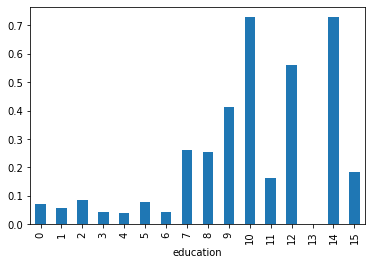

In [137]:
#see the relationship of education and income
df.groupby('education').Salary.mean().plot(kind='bar')

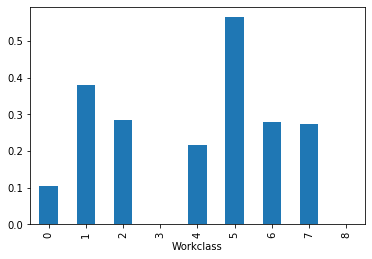

In [138]:
#see the relationship of workclass and income
df.groupby('Workclass').Salary.mean().plot(kind='bar')

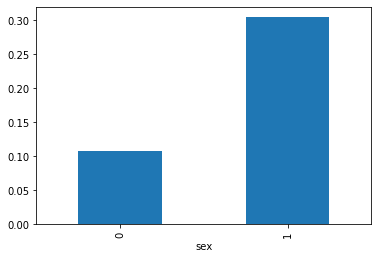

In [139]:
#see the relationship of Sex and income
df.groupby('sex').Salary.mean().plot(kind='bar')

In [140]:
x = df.drop(['Salary'],axis=1)

In [141]:
x

,Workclass,education,marital-status,occupation,relationship,race,sex
0,7,9,4,1,1,4,1
1,6,9,2,4,0,4,1
2,4,11,0,6,1,4,1
3,4,1,2,6,0,2,1
4,4,9,2,10,5,2,0
...,...,...,...,...,...,...,...
19252,4,11,2,1,5,4,0
19253,4,11,4,1,3,4,0
19254,6,11,2,3,0,4,1
19255,6,11,2,14,0,4,1


In [142]:
y = pd.DataFrame(df.Salary)

In [143]:
y

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
19252,0
19253,0
19254,0
19255,0


In [144]:
# split the data set into training (67%) and testing (33%)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .33 , random_state = 42)


In [145]:
#Create models (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log = LogisticRegression()
log.fit(x_train,y_train)
logpred = log.predict(x_test)

print("accuracy_score of Logistic Regression",accuracy_score(y_test,logpred))
print(confusion_matrix(y_test,logpred))
print(classification_report(y_test,logpred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score of Logistic Regression 0.7509837871871556
[[4754   65]
 [1517   17]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4819
           1       0.21      0.01      0.02      1534

    accuracy                           0.75      6353
   macro avg       0.48      0.50      0.44      6353
weighted avg       0.63      0.75      0.66      6353



In [146]:
#Create models (Decision Tree Clasifier)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
treepred = tree.predict(x_test)

print("accuracy_score of Decision Tree Clasifier",accuracy_score(y_test,treepred))
print(confusion_matrix(y_test,treepred))
print(classification_report(y_test,treepred))

accuracy_score of Decision Tree Clasifier 0.8115850779159453
[[4341  478]
 [ 719  815]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4819
           1       0.63      0.53      0.58      1534

    accuracy                           0.81      6353
   macro avg       0.74      0.72      0.73      6353
weighted avg       0.80      0.81      0.81      6353



In [147]:
#Create models (KNN Clasifier)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print("accuracy_score KNN Clasifier",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


accuracy_score KNN Clasifier 0.7919093341728317
[[4299  520]
 [ 802  732]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4819
           1       0.58      0.48      0.53      1534

    accuracy                           0.79      6353
   macro avg       0.71      0.68      0.70      6353
weighted avg       0.78      0.79      0.78      6353



In [148]:
#Create models (Gaussian Clasifier)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)

print("accuracy_score of Gaussian Clasifier",accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

accuracy_score of Gaussian Clasifier 0.7479930741382024
[[3714 1105]
 [ 496 1038]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4819
           1       0.48      0.68      0.56      1534

    accuracy                           0.75      6353
   macro avg       0.68      0.72      0.69      6353
weighted avg       0.79      0.75      0.76      6353



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
#Create models (Support Vector Machine)

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print("accuracy_score Support Vector Machine",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score Support Vector Machine 0.7585392727845113
[[4819    0]
 [1534    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4819
           1       0.00      0.00      0.00      1534

    accuracy                           0.76      6353
   macro avg       0.38      0.50      0.43      6353
weighted avg       0.58      0.76      0.65      6353



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
print("accuracy_score of Logistic Regression",accuracy_score(y_test,logpred))
print()
print("accuracy_score of Decision Tree Clasifier",accuracy_score(y_test,treepred))
print()
print("accuracy_score KNN Clasifier",accuracy_score(y_test,predknn))
print()
print("accuracy_score of Gaussian Clasifier",accuracy_score(y_test,predgnb))
print()
print("accuracy_score Support Vector Machine",accuracy_score(y_test,predsvc))

accuracy_score of Logistic Regression 0.7509837871871556

accuracy_score of Decision Tree Clasifier 0.8115850779159453

accuracy_score KNN Clasifier 0.7919093341728317

accuracy_score of Gaussian Clasifier 0.7479930741382024

accuracy_score Support Vector Machine 0.7585392727845113
